### VISUALIZA EL COMPORTAMIENTO DE LOS ARCHIVOS CSV SELECCIONADOS

Grafica el comportamiento de una columna o mas con respecto a su columna de tiempo.

-ejecutar el codigo

-en la parte inferior del codigo, se muestran las columnas disponibles a graficar

-se abrira un apartado para que pueda escribir la o las columnas que desee graficar, tendra que separar con comas cada columna diferente

-presione enter para graficar

Columnas disponibles para graficar: Index(['fecha', 'valor'], dtype='object')


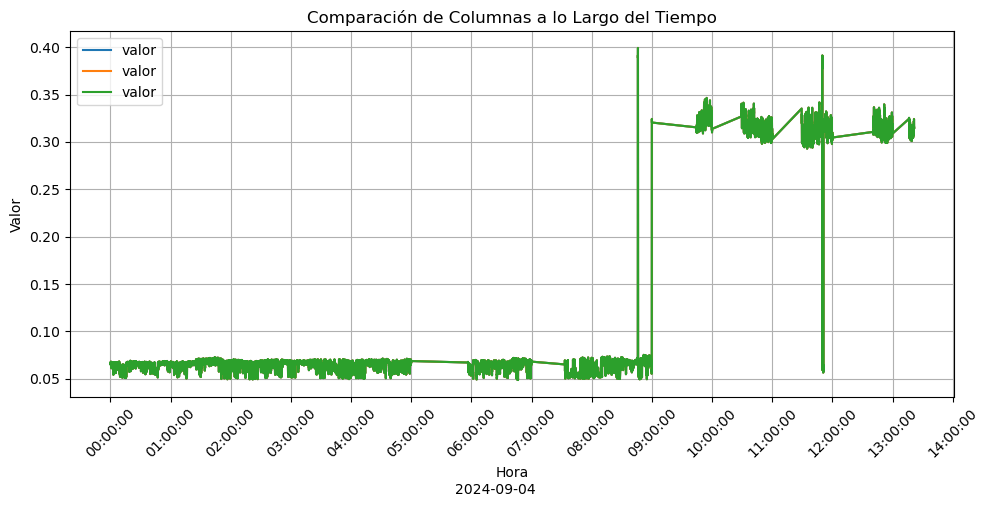

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ruta del archivo CSV
ruta_archivo = 'C:/Users/cesar chavez/Desktop/proyecto/CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Mostrar las columnas disponibles para que el usuario elija
print("Columnas disponibles para graficar:", df.columns)

# Pedir al usuario que elija múltiples columnas para graficar
columnas_a_graficar = input("Ingresa los nombres de las columnas que deseas graficar (separadas por comas): ")
columnas_a_graficar = [col.strip() for col in columnas_a_graficar.split(',')]

# Verificar si las columnas existen en el DataFrame
columnas_invalidas = [col for col in columnas_a_graficar if col not in df.columns]
if columnas_invalidas:
    print(f"Las siguientes columnas no existen en el DataFrame: {', '.join(columnas_invalidas)}")
else:
    # Crear la gráfica
    plt.figure(figsize=(10, 5))
    for columna in columnas_a_graficar:
        plt.plot(df['fecha'], df[columna], linestyle='-', label=columna)  # Línea continua para cada columna

    # Formato de fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Cambiar intervalo según necesidad

    # Añadir títulos y etiquetas
    plt.title('Comparación de Columnas a lo Largo del Tiempo')
    plt.xlabel('Hora')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.legend()  # Añadir leyenda para identificar cada columna

    # Mostrar solo los números de la fecha en el pie de la gráfica
    fecha_unica = df['fecha'].dt.date.unique()
    plt.figtext(0.5, 0.01, ' '.join([str(f) for f in fecha_unica]), ha='center', va='center', fontsize=10)

    # Añadir una cuadrícula
    plt.grid()

    # Ajustar y mostrar la gráfica
    plt.tight_layout()
    plt.show()


Grafica el comportamiento de una columna o mas, en un determinado lapso de tiempo seleccionado y permite guardarlo si asi lo desea

-modificar en el codigo el lapso de tiempo que desee graficar

-continuar el proceso igual al codigo anterior

-si requiere guardar el archivo graficado como un csv escriba la ruta en la siguiente linea de codigo:

 #Guardar el DataFrame filtrado en un nuevo archivo CSV
    nuevo_archivo_csv = 'ruta donde se guardara el archivo csv'

nota: quitar los ultimos tres # si es que desea guardar el archivo

Columnas disponibles para graficar: Index(['fecha', 'valor'], dtype='object')


C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_5608\3631255060.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_5608\3631255060.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]


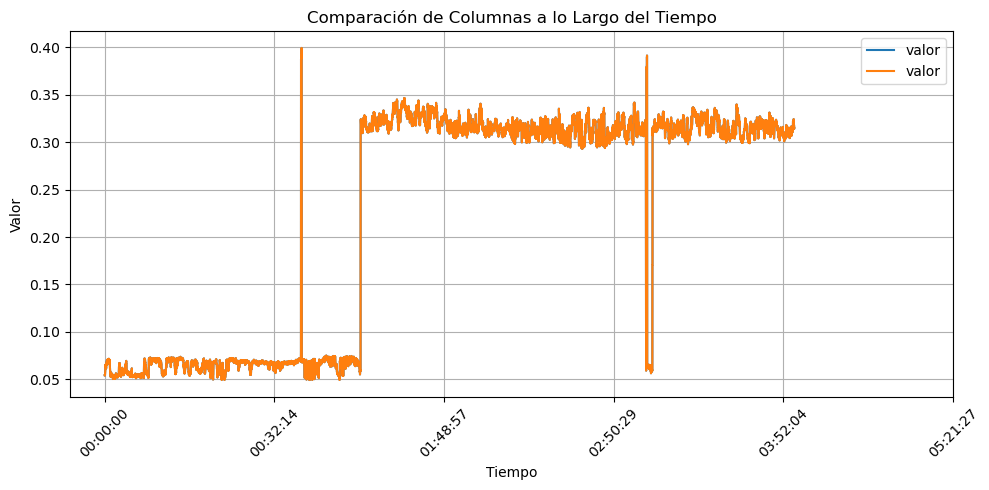

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
ruta_archivo = 'C:/Users/cesar chavez/Desktop/proyecto/CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Mostrar las columnas disponibles para que el usuario elija
print("Columnas disponibles para graficar:", df.columns)

# Pedir al usuario que elija múltiples columnas para graficar
columnas_a_graficar = input("Ingresa los nombres de las columnas que deseas graficar (separadas por comas): ")
columnas_a_graficar = [col.strip() for col in columnas_a_graficar.split(',')]

# Verificar si las columnas existen en el DataFrame
columnas_invalidas = [col for col in columnas_a_graficar if col not in df.columns]
if columnas_invalidas:
    print(f"Las siguientes columnas no existen en el DataFrame: {', '.join(columnas_invalidas)}")
else:
    # Definir el rango de fechas (ajusta según tus necesidades)
    fecha_inicio = '2024-09-04 08:00:00'  # Cambia esta fecha
    fecha_fin = '2024-09-04 14:00:00'      # Cambia esta fecha

    # Filtrar los datos según el rango de fechas
    df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

    # Crear una nueva columna de 'Tiempo' como tiempo transcurrido desde el inicio
    df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
    df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]

    # Crear la gráfica
    plt.figure(figsize=(10, 5))
    for columna in columnas_a_graficar:
        plt.plot(df_filtrado['Tiempo'], df_filtrado[columna], linestyle='-', label=columna)  # Línea continua para cada columna

    # Añadir títulos y etiquetas
    plt.title('Comparación de Columnas a lo Largo del Tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()  # Añadir leyenda para identificar cada columna

    # Configurar ticks en el eje X
    num_ticks = 5  # Número de ticks a mostrar
    plt.xticks(range(0, len(df_filtrado), max(1, len(df_filtrado) // num_ticks)), 
               df_filtrado['Tiempo'][::max(1, len(df_filtrado) // num_ticks)], rotation=45)

    # Añadir una cuadrícula
    plt.grid()

    # Ajustar y mostrar la gráfica
    plt.tight_layout()
    plt.show()

    # Guardar el DataFrame filtrado en un nuevo archivo CSV
    #nuevo_archivo_csv = ''
    #df_filtrado[['Tiempo'] + columnas_a_graficar].to_csv(nuevo_archivo_csv, index=False)

    #print(f"Datos filtrados guardados como '{nuevo_archivo_csv}'.")


### Grafico de calor

quitar los ultimos dos # si es que desea guardar el archivo

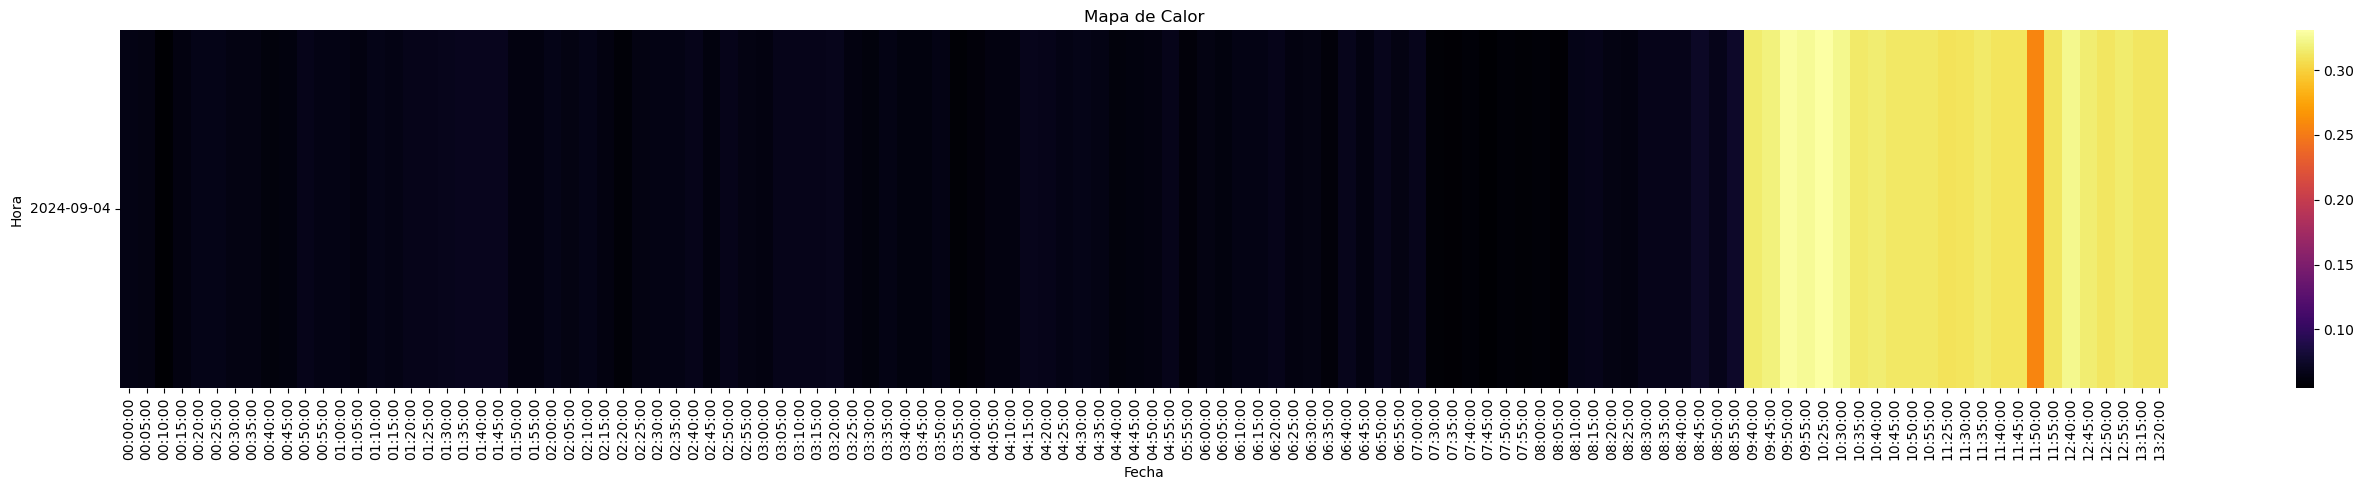

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#CSV a DataFrame
df = pd.read_csv("C:/Users/cesar chavez/Desktop/SegregacionEnergia/archivo_concatenado.csv")

# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

#columna fecha como índice
df.set_index('fecha', inplace=True)

# cada cuanto tiempo necesitas la medicion
df_resampled = df.resample('5min').mean().reset_index()

#fecha y la hora
df_resampled['date'] = df_resampled['fecha'].dt.date
df_resampled['time'] = df_resampled['fecha'].dt.time

# Crear la tabla pivote
pivot_df = df_resampled.pivot_table(index='date', columns='time', values='valor', aggfunc='mean', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(27, 5))
heatmap = sns.heatmap(pivot_df, cmap="inferno", cbar=True)

# Ajustar la visualización
plt.title('Mapa de Calor')
plt.xlabel('Fecha')
plt.ylabel('Hora')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.yticks(rotation=0)   # Rotar las etiquetas del eje y si es necesario
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas

# Guardar la imagen
#plt.savefig('mapa_de_calor.png', dpi=300)  # Guarda la imagen con alta resolución
#plt.show()
